*  i)-->      elegir un método de feature selection para reducir la dimensionalidad del dataset, 
*  ii)-->     elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,
*  iii)-->    cálculo de métricas para validar el modelo
*  iv) -->    generar conclusiones con base en los resultados obtenidos.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


* Analizo las variables Edad y partidos de baja por lesion

*    normalizo para analizar a los jugadores que jugaron la mediana de partido o mas.
*    y luego agrupo por edad.

In [87]:

filtro =df['Apariciones'].median().round(0)
df_filtrado = df[df['Apariciones'] >= filtro]
edades = df_filtrado.groupby('Edad')['Dias De baja por Lesion'].agg(['mean']).reset_index().round(1)

# renombro la columna.
edades.rename(columns={'mean': 'Partidos Baja por Lesion'}, inplace=True)

In [88]:
edades.head()

,Edad,Partidos Baja por Lesion
0,17.0,17.9
1,18.0,34.9
2,19.0,32.8
3,20.0,48.3
4,21.0,59.5


*   Hago un Grafico con las edades, contra los partidos de baja por lesion para ver el comportamiento.

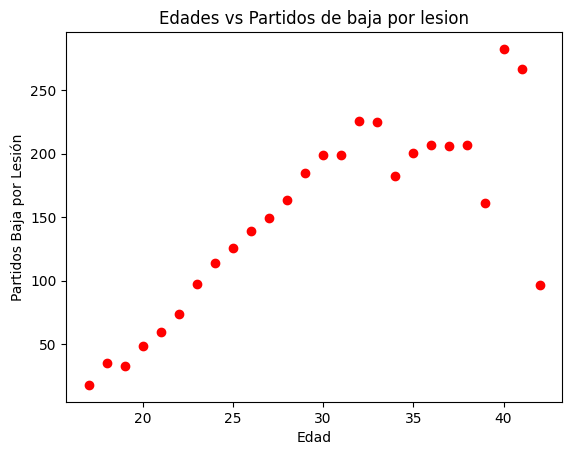

In [105]:
plt.plot(edades['Edad'], edades['Partidos Baja por Lesion'], 'ro')
plt.title('Edades vs Partidos de baja por lesion')
plt.xlabel('Edad')
plt.ylabel('Partidos Baja por Lesión')
plt.show()

In [106]:
# marco las librerias a utlizar.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
edades.columns

Index(['Edad', 'Partidos Baja por Lesion'], dtype='object')

*    Aplicaremos un modelo de Regresion Logistica Simple con las variables Edades y Partidos de Baja por Lesion.

In [108]:

X = edades['Edad'].values.reshape(-1,1)
y = edades['Partidos Baja por Lesion'].values     

In [109]:
# Dividimos el conjunto entre el conjunto de entrenamiento y testing, establezco tamaño de testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# crea una instancia de un modelo de regresión lineal
# Entrenamiento del modelo lineal con los datos
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [111]:
# Predicción de los valores utilizando el modelo
y_pred = lin_reg.predict(X_test)

# muestro los primero valores de la prediccion y los primeros valores reales.
print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [112.62572585 171.1070028   54.14444889 229.58827976], valores reales: [126.  225.3  17.9 266.5]


In [97]:
# calcula el coeficiente de determinación R2 
r_squared = lin_reg.score(X_test, y_test) 

#  Esta línea calcula el error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False) #RMSE

# muestro los valores

print(r_squared, rmse)

0.8129298190405395 34.116197249101845


In [98]:
# Medida numérica de qué tan bien se ajustan las predicciones deL  modelo a los valores reales 
# de la variable dependiente en los datos de prueba.
r2_score(y_test, y_pred) 

0.8129298190405395

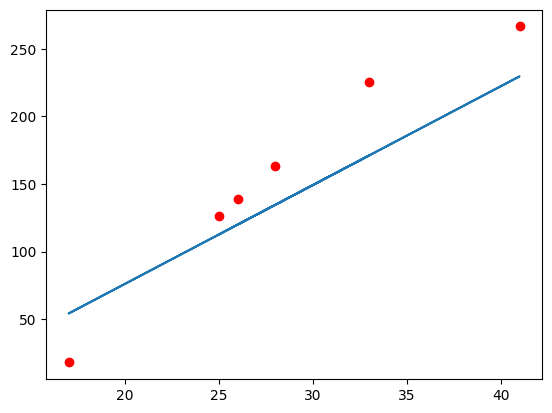

In [99]:

# Gráfico de los datos de test contra el modelo
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred.reshape(-1,1))
plt.show()

*  Podemos concluir que el modelo aplicado de analizar la edad, contra los partidos de baja por Lesion, el mismo,  aplicado explica aproximadamente el 81% de la variabilidad en el número de partidos de baja por lesión (basado en el R2  de 0.8129), lo que indica que el modelo tiene una efectividad del 81% para explicar las variaciones observadas en los datos.

*   El valor de RMSE de 34.12 significa que, en promedio, las predicciones del modelo están desviadas de los valores reales en aproximadamente 34.12 unidades. 

*   En resumen, un RMSE de 34.12 sugiere que el modelo tiene un nivel de precisión aceptable en la predicción del número de partidos de baja por lesión, pero aún hay un margen para mejorar la precisión del modelo